# Project Prototype 

In [1]:
from scipy import stats
import math
import seaborn as sns

import pandas as pd
Mortality = pd.read_csv("Mortality Both Sexes.csv")
MortalityF = pd.read_csv("Mortality Female.csv")
MortalityM = pd.read_csv("Mortality Male.csv")
Alcohol = pd.read_csv("WHOAlcoholTotalPerCapita_2021-09-20v2.csv")

In [2]:
Alcohol = Alcohol[Alcohol['Year']>=2000]
Alcohol = Alcohol[Alcohol['Year']<=2016]
Alcohol = Alcohol.drop(columns = {'WHO Region Code',
                                  'Country Code','Alcohol total per capita (15+) consumption in liters (string)'},
                       axis= '1')
Alcohol = Alcohol[Alcohol['Country']!='Cook Islands']
Alcohol = Alcohol[Alcohol['Country']!='Dominica']
Alcohol = Alcohol[Alcohol['Country']!='Nauru']
Alcohol = Alcohol[Alcohol['Country']!='Niue']
Alcohol = Alcohol[Alcohol['Country']!='Saint Kitts and Nevis']
Alcohol = Alcohol[Alcohol['Country']!='Surinam']
Alcohol = Alcohol[Alcohol['Country']!='Tuvalu']
Alcohol = Alcohol[Alcohol['Country']!='Andorra']
Alcohol['alc'] = Alcohol['Alcohol total per capita (15+) consumption in liters (numeric)']

In [3]:
accidents = pd.read_csv("accidents.csv")
accidents.rename(columns = {"Unnamed: 0":"Country", "Unnamed: 1":"Year", 
                            "Estimated number of road traffic deaths":"All road deaths", 
                           "Estimated number of road traffic deaths.1":"Male road deaths",
                           "Estimated number of road traffic deaths.2":"Female road deaths",
                           "Estimated road traffic death rate (per 100 000 population)":"Total road death rate",
                           "Estimated road traffic death rate (per 100 000 population).1":"Male road death rate",
                           "Estimated road traffic death rate (per 100 000 population).2":"Female road death rate"}, inplace=True)
accidents = accidents.iloc[1:,:]
accidents["All road deaths"] = [num.split(" ")[0] for num in accidents["All road deaths"]]
accidents["Male road deaths"] = [num.split(" ")[0] for num in accidents["Male road deaths"]]
accidents["Female road deaths"] = [num.split(" ")[0] for num in accidents["Female road deaths"]]
accidents["Total road death rate"] = [num.split(" ")[0] for num in accidents["Total road death rate"]]
accidents["Male road death rate"] = [num.split(" ")[0] for num in accidents["Male road death rate"]]
accidents["Female road death rate"] = [num.split(" ")[0] for num in accidents["Female road death rate"]]
accidents["All road deaths"]= accidents["All road deaths"].astype(int)
accidents["Male road deaths"] = accidents["Male road deaths"].astype(int)
accidents["Female road deaths"] = accidents["Female road deaths"].astype(int)
accidents["Total road death rate"] = accidents["Total road death rate"].astype(float)
accidents["Male road death rate"] = accidents["Male road death rate"].astype(float)
accidents["Female road death rate"] = accidents["Female road death rate"].astype(float)
accidents["Year"] = accidents["Year"].astype(int)
accidents = accidents[accidents['Year']>=2000]
accidents = accidents[accidents['Year']<=2016]

In [4]:
accidents.head()

,Country,Year,All road deaths,Male road deaths,Female road deaths,Total road death rate,Male road death rate,Female road death rate
4,Afghanistan,2016,5240,4239,1001,14.8,23.3,5.8
5,Afghanistan,2015,4942,3981,961,14.4,22.5,5.7
6,Afghanistan,2014,4693,3750,943,14.1,21.9,5.8
7,Afghanistan,2013,4506,3575,932,14.0,21.6,5.9
8,Afghanistan,2012,4296,3405,890,13.8,21.3,5.9


In [5]:
df = pd.merge(Alcohol,accidents, left_on = ['Country','Year'],right_on = ['Country', 'Year'])




In [6]:
df = df.groupby('Country').mean()

In [7]:
df["alc"].corr(df["Total road death rate"])

-0.2995412121748023

### Question 1


Text(0.5, 1.0, 'Alcohol Consumption v.s. Road Accident Deaths by Country')

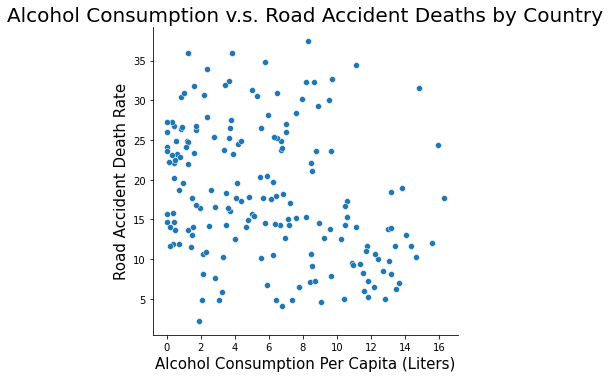

In [8]:
import matplotlib.pyplot as plt
sns.relplot(data=df, x='alc', y='Total road death rate')
plt.xlabel("Alcohol Consumption Per Capita (Liters)", fontsize=15)
plt.ylabel("Road Accident Death Rate", fontsize=15)
plt.title("Alcohol Consumption v.s. Road Accident Deaths by Country", fontsize=20)

In [9]:
df["alc"].corr(df["Total road death rate"])

-0.2995412121748023

In [10]:
df["alc"].corr(df["Female road death rate"])

-0.3155556243287253

In [11]:
df["alc"].corr(df["Male road death rate"])

-0.2406904431904004

In [12]:
sortByDeaths = df.sort_values(by="Total road death rate", ascending=False)
sortByAlc = df.sort_values(by="alc", ascending=False)
sortByAlc = sortByAlc.reset_index()
print("Top 10 countries by road death rate")
top10 = df.sort_values(by="Total road death rate", ascending=False)[:10].index.values
for i in range(10): 
    print(str(i+1) + ". ", top10[i] + " ("+str(sortByAlc[sortByAlc["Country"]==top10[i]].index.values[0]+1) + "th in alc Consumption)")


Top 10 countries by road death rate
1.  Thailand (56th in alc Consumption)
2.  Democratic Republic of the Congo (145th in alc Consumption)
3.  Zimbabwe (108th in alc Consumption)
4.  Liberia (88th in alc Consumption)
5.  Rwanda (30th in alc Consumption)
6.  Eritrea (128th in alc Consumption)
7.  South Africa (39th in alc Consumption)
8.  Central African Republic (112th in alc Consumption)
9.  Burundi (58th in alc Consumption)
10.  Venezuela (Bolivarian Republic of) (50th in alc Consumption)


In [24]:
alc_med = df["alc"].mean()
road_med = df["Total road death rate"].mean()
filtered_alc = df[df["alc"] > alc_med]

$H0$ is that at most half of the countries that have an alcohol consumption per capita that is greater than the world mean (5.95) will have a road traffic death rate that is lower than the world mean (18.18). <br>
$H1$ is that more than half of the countries that have an alcohol consumption per capita that is greater than the world mean (5.95) will have a road traffic death rate that is lower than than the world mean (18.18) <br>
$p-value$ is the probability that 50% of the 98 countries that have an alcohol consumption per capita greater than the world mean (5.95) have a road rate of at most 18.18.


In [25]:
pval = stats.ttest_1samp(filtered_alc["Total road death rate"], road_med, alternative="less")[1]
print("p-value is " + str(pval) + ", therefore we reject the null hypothesis.")

p-value is 0.008743005110611796, therefore we reject the null hypothesis.


### Question 2

In [16]:
byLocation = Mortality.groupby('Location').mean()
print(byLocation)

                                     Unnamed: 0  Period  Adult mortality rate
Location                                                                     
Afghanistan                         1566.411765  2008.0            266.335294
Albania                             1496.882353  2008.0            101.574706
Algeria                             1516.235294  2008.0            113.668824
Angola                              1575.235294  2008.0            297.294118
Antigua and Barbuda                 1495.117647  2008.0            140.858824
...                                         ...     ...                   ...
Venezuela (Bolivarian Republic of)  1517.647059  2008.0            166.700000
Viet Nam                            1488.882353  2008.0            133.300000
Yemen                               1556.235294  2008.0            239.388235
Zambia                              1597.705882  2008.0            446.694118
Zimbabwe                            1606.529412  2008.0         

### Question 3


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### Question 4

In [18]:
df = df.dropna()
data = df[["alc"]].values
target = df["Total road death rate"].values


linear_model = LinearRegression()
linear_model.fit(X=data, y=target)




LinearRegression()

In [19]:

df["predicted_dr"] = linear_model.predict(data)
mse = mean_squared_error(df["Total road death rate"].values, df["predicted_dr"].values) # float: MSE
r2 = r2_score(df["Total road death rate"].values, df["predicted_dr"].values)  # float: R^2 score

print("MSE:", mse, "r^2:", r2)

MSE: 63.237127437611186 r^2: 0.08972493779114976


In [26]:
alc_med

5.9488685507722625

In [21]:
road_med

18.176993098915542